<!-- 
<div style="background-image: url('https://cdn.visualwilderness.com/wp-content/uploads/2019/05/Mothership-VW.jpg'); background-size: cover; background-position: center; padding: 20px; height: 500px; border-radius: 20px;">
    <h1 style="font-weight: bold; font-size: 60px; font-family: avenir; color: white; ">Flood Prediction</h1> -->


<div style="position: relative; padding: 20px; border-radius: 20px;">
    <img src="./images/storm.jpg" alt="Storm" style="width: 100%; height: 100%; object-fit: cover; border-radius: 20px;">
    <h1 style="position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); font-weight: bold; font-size: 60px; font-family: avenir; color: white; ">Flood Prediction</h1>
</div>





<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Overview

The analysis involves examining various factors to understand their influence on flood detection and prediction. This process is crucial for authorities, policymakers, and individuals to make informed decisions about flood risk management and mitigation strategies.

### Dataset

The dataset used for this analysis comprises numerous features, providing essential insights into environmental and human factors that influence flood occurrence and severity. These features include:

- **id**
- **MonsoonIntensity**
- **TopographyDrainage**
- **RiverManagement**
- **Deforestation**
- **Urbanization**
- **ClimateChange**
- **DamsQuality**
- **Siltation**
- **AgriculturalPractices**
- **Encroachments**
- **IneffectiveDisasterPreparedness**
- **DrainageSystems**
- **CoastalVulnerability**
- **Landslides**
- **Watersheds**
- **DeterioratingInfrastructure**
- **PopulationScore**
- **WetlandLoss**
- **InadequatePlanning**
- **PoliticalFactors**
- **FloodProbability**

### Objectives

1. Develop a comprehensive understanding of the relationships between different factors and flood prediction.
2. Investigate the impact of various factors such as monsoon intensity, topography drainage, river management, deforestation, urbanization, climate change, dams quality, siltation, agricultural practices, encroachments, ineffective disaster preparedness, drainage systems, coastal vulnerability, landslides, watersheds, deteriorating infrastructure, population score, wetland loss, inadequate planning, and political factors on flood probability.
3. Provide valuable insights to authorities, policymakers, and individuals to facilitate better decision-making regarding flood risk management and mitigation strategies.

### Methodology

1. **Data Collection and Preprocessing:** Utilize the comprehensive dataset and preprocess it by normalizing numerical features.
2. **Feature Engineering:** Extract relevant features and potentially create new ones to enhance the understanding of flood prediction.
3. **Data Analysis:** Explore various statistical methods to identify the relationships and dependencies between different factors and flood probability.
4. **Data Interpretation:** Interpret the results of the data analysis to gain insights into the underlying factors influencing flood prediction.

### Steps

1. **Data Preprocessing:**
   - Normalize numerical features to facilitate accurate comparisons.

2. **Feature Engineering:**
   - Identify and extract significant features from the dataset.
   - Create new features if necessary to better capture the intricacies of flood prediction.

3. **Data Analysis:**
   - Utilize statistical methods such as correlation analysis, regression models, and classification algorithms to uncover relationships between factors and flood probability.
   - Visualize data to identify trends and patterns that might indicate potential flood risks.

4. **Data Interpretation:**
   - Analyze the outcomes of the statistical methods to understand how each factor contributes to flood probability.



<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">



    
## Libraries

In [1]:
# Ignore Warnings
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn.preprocessing import  RobustScaler, StandardScaler, MinMaxScaler, FunctionTransformer

# Feature Selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion  # Импорт классов Pipeline и make_pipeline из scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin  # Импорт базовых классов BaseEstimator и TransformerMixin

# Metrics
from sklearn.metrics import (mean_squared_error, make_scorer, r2_score)

# Feature Selection
from sklearn.linear_model import LassoCV

# Metrics
import math


# Regression Algorithms
from lightgbm import LGBMRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
    
### Project Structure

1. [**Loading Data**](#first): Load the dataset from a file or source into a DataFrame for analysis.
2. [**Data Preprocessing**](#second): Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.
3. [**Exploratory Data Analysis (EDA)**](#third): Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.
4. [**Feature Engineering**](#fifth): Create new features or transform existing ones to improve the predictive power of the model.
6. [**Feature Selection**](#nth): Utilize machine learning algorithms to select the best features.
7. [**Data Splitting**](#sixth): Split the training dataset into features (x) and the target variable (y) to prepare for model training.
8. [**Model Training and Validating**](#seventh): Training the model.
9. [**Model Evaluation and Data Interpretation**](#eighth): Evaluate the trained model's performance using appropriate metrics and techniques.
10. [**Test Submission**](#ten): Submitting Test dataset for valuation.

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='first'></a> Loading Data

In [2]:
# Path to the CSV data file
TRAIN_DATAPATH = './data/train.csv'
TEST_DATAPATH = './data/test.csv'

# # Reading data from the CSV file into a DataFrame
train = pd.read_csv(TRAIN_DATAPATH) 
test = pd.read_csv(TEST_DATAPATH) 

# Concatenating train and test dataframes along axis 0 (rows) to combine them into a single dataframe.
df = pd.concat([train, test], axis=0)


# Displaying the first few rows of the DataFrame
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [3]:
df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [4]:
# Dropping the 'id' column from the dataframe.
df.drop(columns=['id'], inplace=True)

In [5]:
# Initialize empty lists to store object and non-object columns
obj = []
ints = []

# Loop through DataFrame columns
for col in df.columns:
    # Check if column data type is object
    if df[col].dtype == 'object':
        # If object, append column name, unique values count, and count of missing values to 'obj' list
        obj.append((col, df[col].nunique(), df[col].isna().sum()))
    else:
        # If non-object, append column name, unique values count, and count of missing values to 'ints' list
        ints.append((col, df[col].nunique(), df[col].isna().sum(), df[col].skew()))

# Determine the maximum length of 'obj' and 'ints' lists
max_len = max(len(obj), len(ints))

# Extend 'obj' and 'ints' lists with empty tuples to match the maximum length
obj.extend([('', '', '')] * (max_len - len(obj)))
ints.extend([('', '', '', '')] * (max_len - len(ints)))

# Create a dictionary with keys representing column categories and values representing lists of corresponding data
data = {
    'Numeric_columns': [x[0] for x in ints],
    'int_cols_uniques': [x[1] for x in ints],
    'int_cols_missing': [x[2] for x in ints],
    'int_cols_skew': [x[3] for x in ints]
}

# Convert the dictionary into a pandas DataFrame
pd.DataFrame(data)




,Numeric_columns,int_cols_uniques,int_cols_missing,int_cols_skew
0,MonsoonIntensity,17,0,0.442604
1,TopographyDrainage,19,0,0.459388
2,RiverManagement,17,0,0.421438
3,Deforestation,18,0,0.436175
4,Urbanization,18,0,0.444870
5,ClimateChange,18,0,0.430080
6,DamsQuality,17,0,0.441276
7,Siltation,17,0,0.451439
8,AgriculturalPractices,17,0,0.419652
9,Encroachments,19,0,0.459940


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
**Categorical Columns:**
- The dataset includes no categorical variables.

**Numeric Columns:**
- The dataset includes 21 numeric variables such as 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', and 'FloodProbability'.
- These numeric variables have different numbers of unique values, ranging from 17 ('MonsoonIntensity', 'RiverManagement', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'IneffectiveDisasterPreparedness', 'Landslides', 'Watersheds', 'InadequatePlanning', 'PoliticalFactors') to 83 ('FloodProbability').
- There are no missing values in these numeric columns.
- The skewness of these numeric columns varies, indicating different levels of asymmetry around the mean. For instance, 'MonsoonIntensity' has a positive skew (0.442604), indicating that the distribution has a long right tail. On the other hand, 'FloodProbability' has a near-zero skew (0.047226), indicating relatively symmetric distribution.



In [6]:
# Printing out the column names of the dataframe.
print(df.columns)


Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


<!-- <div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE);background-image: url('https://www.icegif.com/wp-content/uploads/fat-lady-singing-icegif-4.gif'); border: 2px solid #000; border-radius: 10px; font-family: avenir;"> -->

<div style="position: relative; padding: 10px; background-image: linear-gradient(to right, #ECE3CE, #fffff); border: 2px solid #000; border-radius: 10px; font-family: avenir;">



<!-- <div style="position: absolute; bottom: 10; right: 0; width: 300px; height: 300px; background-image: url('https://i.gifer.com/TOSe.gif'); background-size: cover;border-radius: 10px;"></div> -->

<div style="position: absolute; bottom: 25px; right: 25px; width: 200px; height: 180px; background-image: url('https://i.pinimg.com/originals/ee/1f/f9/ee1ff96d8c115cec47cee9b63d247fa1.gif'); background-size: 100% 100%; border-radius: 10px;"></div>



- **MonsoonIntensity**: The intensity of the monsoon in a given region.
- **TopographyDrainage**: The drainage capacity based on the topography of the region.
- **RiverManagement**: The quality and effectiveness of river management practices.
- **Deforestation**: The extent of deforestation in the area.
- **Urbanization**: The level of urbanization in the region.
- **ClimateChange**: The impact of climate change on the region.
- **DamsQuality**: The quality and maintenance status of dams.
- **Siltation**: The extent of siltation in rivers and reservoirs.
- **AgriculturalPractices**: The types and sustainability of agricultural practices.
- **Encroachments**: The degree of encroachment on flood plains and natural waterways.
- **IneffectiveDisasterPreparedness**: The level of disaster preparedness and effectiveness of response measures.
- **DrainageSystems**: The condition and capacity of urban and rural drainage systems.
- **CoastalVulnerability**: The vulnerability of coastal areas to flooding and erosion.
- **Landslides**: The frequency and severity of landslides in the region.
- **Watersheds**: The health and management of watershed areas.
- **DeterioratingInfrastructure**: The condition of infrastructure related to flood management.
- **PopulationScore**: The density and distribution of the population in the region.
- **WetlandLoss**: The extent of wetland loss and degradation.
- **InadequatePlanning**: The effectiveness and adequacy of planning measures for flood prevention and mitigation.
- **PoliticalFactors**: The influence of political factors on flood management and response.
- **FloodProbability**: The overall probability of flooding in the region. This is the target variable for predictive analysis.

</div>


In [7]:
# This line of code retrieves the shape of the DataFrame 'df'
shape = df.shape
print(shape)

(1863262, 21)


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='second'></a> Data Preprocessing

In [8]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1863262 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MonsoonIntensity                 int64  
 1   TopographyDrainage               int64  
 2   RiverManagement                  int64  
 3   Deforestation                    int64  
 4   Urbanization                     int64  
 5   ClimateChange                    int64  
 6   DamsQuality                      int64  
 7   Siltation                        int64  
 8   AgriculturalPractices            int64  
 9   Encroachments                    int64  
 10  IneffectiveDisasterPreparedness  int64  
 11  DrainageSystems                  int64  
 12  CoastalVulnerability             int64  
 13  Landslides                       int64  
 14  Watersheds                       int64  
 15  DeterioratingInfrastructure      int64  
 16  PopulationScore                  int64  
 17  WetlandLoss   

In [9]:
# Displaying the data types of each column in the DataFrame
df.dtypes

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [10]:
# Calculate the sum of missing values for each column and reset the index, storing the result in a new DataFrame called 'isna'
isna = df.isna().sum().reset_index(name="missing_values")

# Calculate the percentage of missing values for each column and add it as a new column called 'percentage' in the 'isna' DataFrame
isna['percentage'] = round((isna['missing_values'] / df.shape[0]) * 100, 2)

# Sort the 'isna' DataFrame by the 'missing_values' column in descending order and display the top 35 rows
isna.sort_values(by='missing_values', ascending=False)


,index,missing_values,percentage
20,FloodProbability,745305,40.0
11,DrainageSystems,0,0.0
19,PoliticalFactors,0,0.0
18,InadequatePlanning,0,0.0
17,WetlandLoss,0,0.0
16,PopulationScore,0,0.0
15,DeterioratingInfrastructure,0,0.0
14,Watersheds,0,0.0
13,Landslides,0,0.0
12,CoastalVulnerability,0,0.0


In [11]:
# Counting the number of duplicated rows in the DataFrame 
df.duplicated().value_counts()


False    1863262
Name: count, dtype: int64

In [12]:
df.isnull().sum()

MonsoonIntensity                        0
TopographyDrainage                      0
RiverManagement                         0
Deforestation                           0
Urbanization                            0
ClimateChange                           0
DamsQuality                             0
Siltation                               0
AgriculturalPractices                   0
Encroachments                           0
IneffectiveDisasterPreparedness         0
DrainageSystems                         0
CoastalVulnerability                    0
Landslides                              0
Watersheds                              0
DeterioratingInfrastructure             0
PopulationScore                         0
WetlandLoss                             0
InadequatePlanning                      0
PoliticalFactors                        0
FloodProbability                   745305
dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Preprocessing the Column Names

In [13]:
# Initialize an empty list to store the transformed column names
new_columns = []

# Iterate through the current column names in the DataFrame
for j in df.columns.tolist():
    # Convert each column name to a list of characters
    col = list(j)
    
    # Find the indices of uppercase characters (excluding the first character) to insert underscores
    upper_case_indices = [index for index, char in enumerate(j) if char.isupper() and index != 0]
    
    # Iterate through the uppercase indices in reverse order and insert underscores
    for snake in reversed(upper_case_indices):
        col.insert(snake, '_')
    
    # Join the characters back together to form the transformed column name and append it to the new_columns list
    new_columns.append(''.join(col))

# Assign the transformed column names to the DataFrame's columns attribute
df.columns = new_columns

# Convert all column names to lowercase
df.columns = df.columns.str.lower()


# Displaying the first few rows of the dataframe.
df.head()


,monsoon_intensity,topography_drainage,river_management,deforestation,urbanization,climate_change,dams_quality,siltation,agricultural_practices,encroachments,...,drainage_systems,coastal_vulnerability,landslides,watersheds,deteriorating_infrastructure,population_score,wetland_loss,inadequate_planning,political_factors,flood_probability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='third'></a> Exploratory Data Analysis

In [14]:
# Generate descriptive statistics for all numerical columns
df.describe()

,monsoon_intensity,topography_drainage,river_management,deforestation,urbanization,climate_change,dams_quality,siltation,agricultural_practices,encroachments,...,drainage_systems,coastal_vulnerability,landslides,watersheds,deteriorating_infrastructure,population_score,wetland_loss,inadequate_planning,political_factors,flood_probability
count,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,...,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.117957e+06
mean,4.919114e+00,4.928117e+00,4.957204e+00,4.943778e+00,4.940879e+00,4.933865e+00,4.956914e+00,4.927735e+00,4.943695e+00,4.949786e+00,...,4.945737e+00,4.955283e+00,4.929874e+00,4.929707e+00,4.925969e+00,4.927295e+00,4.949885e+00,4.940434e+00,4.940970e+00,5.044803e-01
std,2.056351e+00,2.093974e+00,2.072001e+00,2.052055e+00,2.082761e+00,2.058342e+00,2.085565e+00,2.066839e+00,2.070490e+00,2.082694e+00,...,2.072334e+00,2.088854e+00,2.078575e+00,2.082776e+00,2.065143e+00,2.073982e+00,2.067574e+00,2.080325e+00,2.089166e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.900000e+01,2.200000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [15]:
# Define base features by dropping the target variable column
BASE_FEATURES = df.drop(columns='flood_probability').columns


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Visualising Numerical features distribution

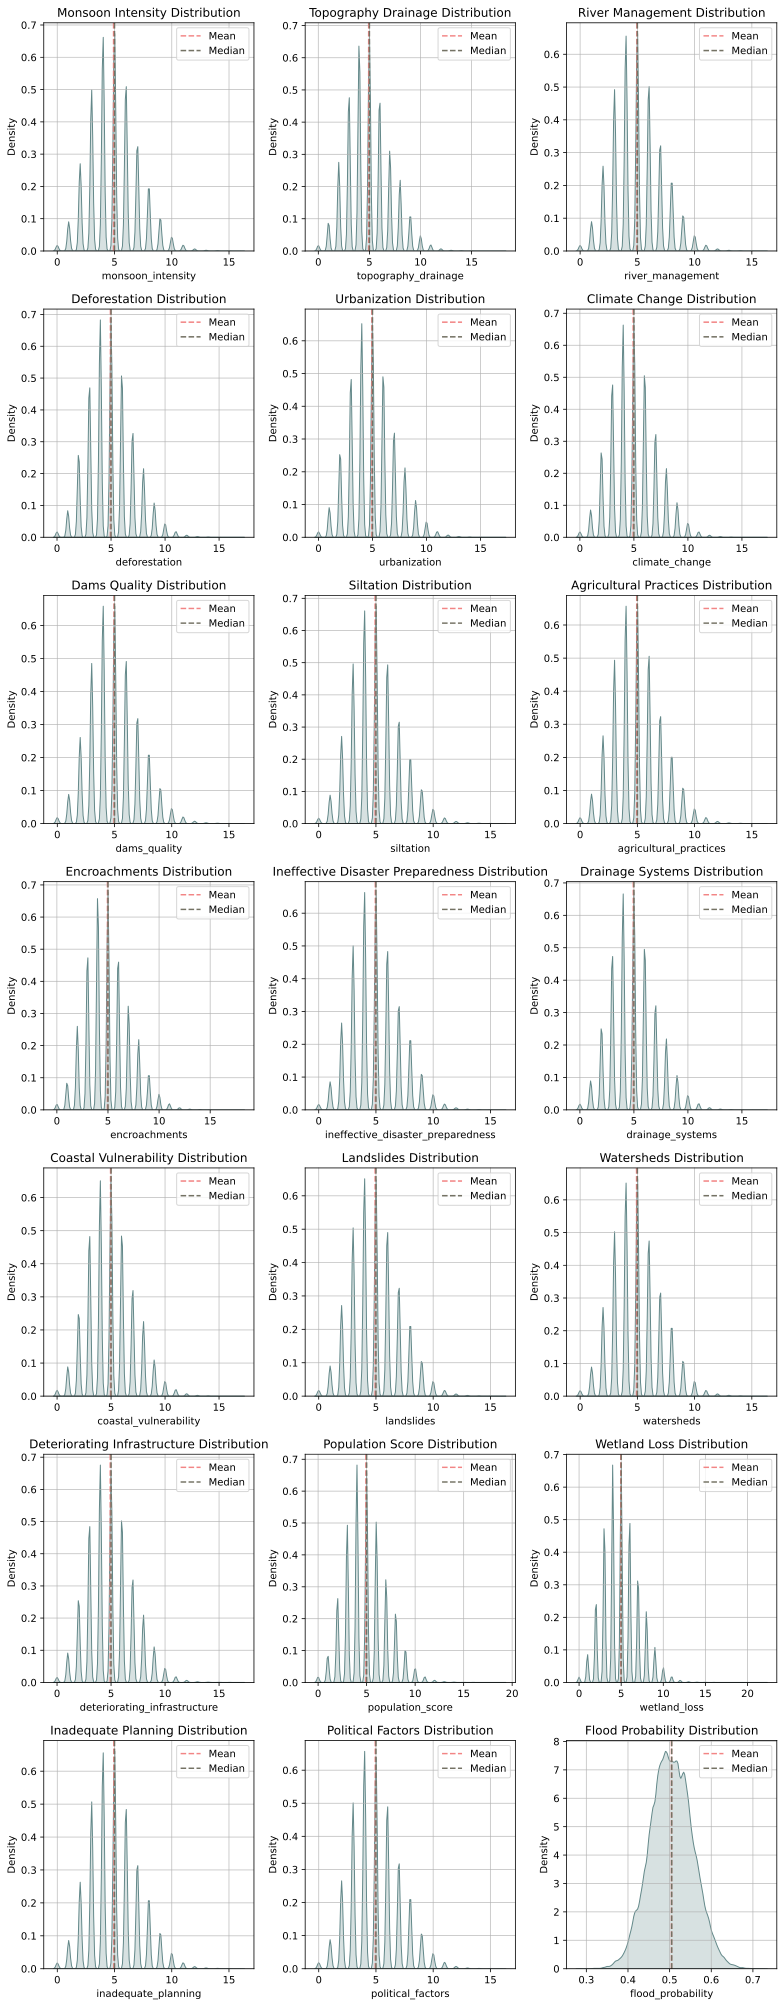

In [16]:
# Select numerical columns from the DataFrame
numerics = df.select_dtypes(include=np.number)

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)



# Set the figure size based on the number of rows
plt.figure(figsize=(11, 4 * num_rows))

# Iterate over each numerical column and create a histogram subplot
for i, col in enumerate(numerics, 1):
    plt.subplot(num_rows, num_columns, i)  # Create subplot
    mean_values = numerics[col].mean()
    median = numerics[col].median()

    sns.kdeplot(numerics[col], fill=True, color='#638889')  # Plot histogram using seaborn
    plt.axvline(x=mean_values, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median, color='#747264', linestyle='--', label='Median')
    plt.grid(True, alpha=0.8)  # Add grid lines to the plot
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot
    plt.savefig('./images/kdeplot.png')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

<!-- ![My Image](./images/kdeplot.png) -->

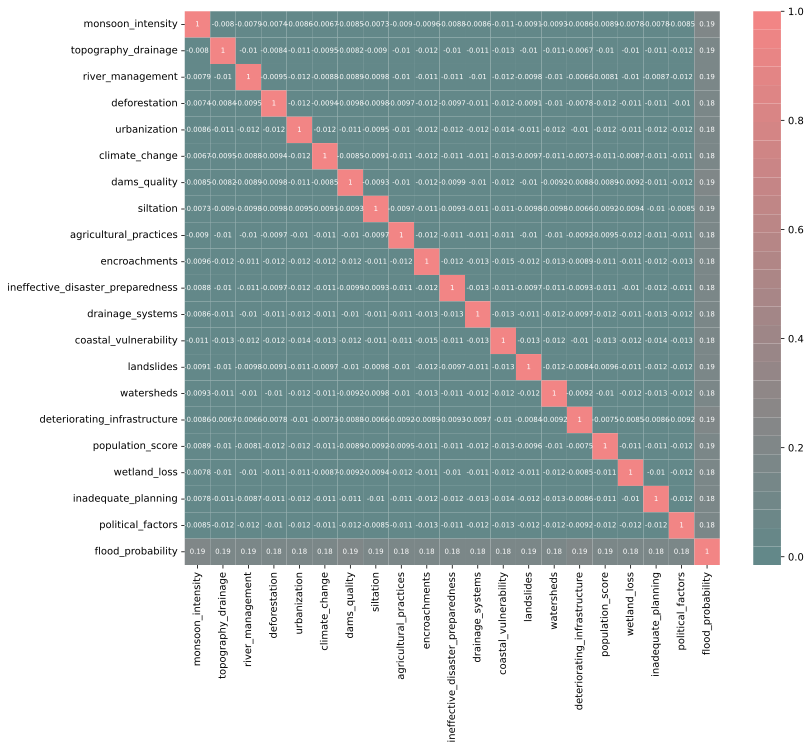

In [17]:
# Create a figure with custom size
plt.figure(figsize=(12, 10))

# Generate a heatmap of correlations for numerical columns in the DataFrame
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),  # DataFrame correlation matrix for numerical columns
    annot=True,  # Show correlation values in cells
    cmap=['#638889', '#678788', '#6c8788', '#718788', '#768788', '#7b8788', '#808788', '#858788', '#8a8787', '#8f8787', 
          '#948687', '#998687', '#9e8687', '#a38687', '#a88687', '#ac8686', '#b18686', '#b68686', '#bb8686', '#c08686',
          '#c58586', '#ca8586', '#cf8585', '#d48585', '#d98585', '#de8585', '#e38585', '#e88585', '#ed8585', '#f28585'],
    annot_kws={"fontsize": 7}  # Annotation font size
)

# Display the heatmap
plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='fifth'></a> Feature Engineering

In [18]:

# Get list of columns excluding 'flood_probability'
cols = df.drop(columns='flood_probability').columns.tolist()

# Define statistical functions to apply
funcs = [np.sum, np.mean, np.std, np.max, np.min, np.median]

# Apply each statistical function to each row in the DataFrame
for func in funcs:
    df[f'features_{func.__name__}'] = df[cols].agg(func, axis=1)    

In [19]:
df.head()

,monsoon_intensity,topography_drainage,river_management,deforestation,urbanization,climate_change,dams_quality,siltation,agricultural_practices,encroachments,...,wetland_loss,inadequate_planning,political_factors,flood_probability,features_sum,features_mean,features_std,features_max,features_min,features_median
0,5,8,5,8,6,4,4,3,3,4,...,5,7,3,0.445,94,4.70,1.750188,8,2,4.5
1,6,7,4,4,8,8,3,5,4,6,...,3,4,3,0.450,94,4.70,2.296450,9,0,4.0
2,6,5,6,7,3,7,1,5,4,5,...,2,3,3,0.530,99,4.95,1.932411,8,1,5.0
3,3,4,6,5,4,8,4,7,6,8,...,5,7,5,0.535,104,5.20,1.641565,8,2,5.0
4,5,3,2,6,4,4,3,3,3,3,...,2,3,5,0.415,72,3.60,1.500877,6,1,3.0


In [20]:
# Define feature groups with respective features
feature_list = {'env_degradation_index' : ['deforestation', 'urbanization', 'wetland_loss', 'siltation'], 
                'infrastructure_vulnerability_score' : ['dams_quality', 'drainage_systems', 'deteriorating_infrastructure',
                                                        'ineffective_disaster_preparedness'],
                'human_impact_factor' : ['deforestation', 'urbanization', 'agricultural_practices', 'encroachments'], 
                'climate_stress_index' : ['monsoon_intensity', 'climate_change'], 
                'governance_planning_efficiency' : ['river_management', 'inadequate_planning', 'political_factors'], 
                'disaster_preparedness_index' : ['ineffective_disaster_preparedness', 'drainage_systems', 'dams_quality'], 
                'population_pressure_index' : ['population_score', 'urbanization', 'encroachments'], 
                'natural_hazard_risk_score' : ['landslides', 'coastal_vulnerability'], 
                'water_management_effectiveness' : ['watersheds', 'river_management', 'dams_quality'], 
                'developmental_impact_index' : ['urbanization', 'agricultural_practices', 'deforestation']}

In [21]:
# Calculate weights for each feature group
weights = [1/len(value) for key, value in feature_list.items()]

# Initialize columns with zeros for each feature group
for key in feature_list.keys():
    df[key] = 0

# Apply weighted sum for each feature group
for weight, (name, features) in zip(weights, feature_list.items()):
    for feature in features:
        df[name] += (df[feature] * weight)


In [22]:
df[feature_list.keys()].head()
        

,env_degradation_index,infrastructure_vulnerability_score,human_impact_factor,climate_stress_index,governance_planning_efficiency,disaster_preparedness_index,population_pressure_index,natural_hazard_risk_score,water_management_effectiveness,developmental_impact_index
0,5.50,3.75,5.25,4.5,5.000000,3.666667,5.666667,3.0,4.666667,5.666667
1,5.00,6.00,5.50,7.0,3.666667,6.333333,5.666667,1.0,3.333333,5.333333
2,4.25,5.00,4.75,6.5,4.000000,4.666667,5.333333,5.0,4.000000,4.666667
3,5.25,3.75,5.75,5.5,6.000000,3.666667,6.000000,5.5,4.666667,5.000000
4,3.75,3.50,4.00,4.5,3.333333,3.333333,2.666667,4.0,3.666667,4.333333


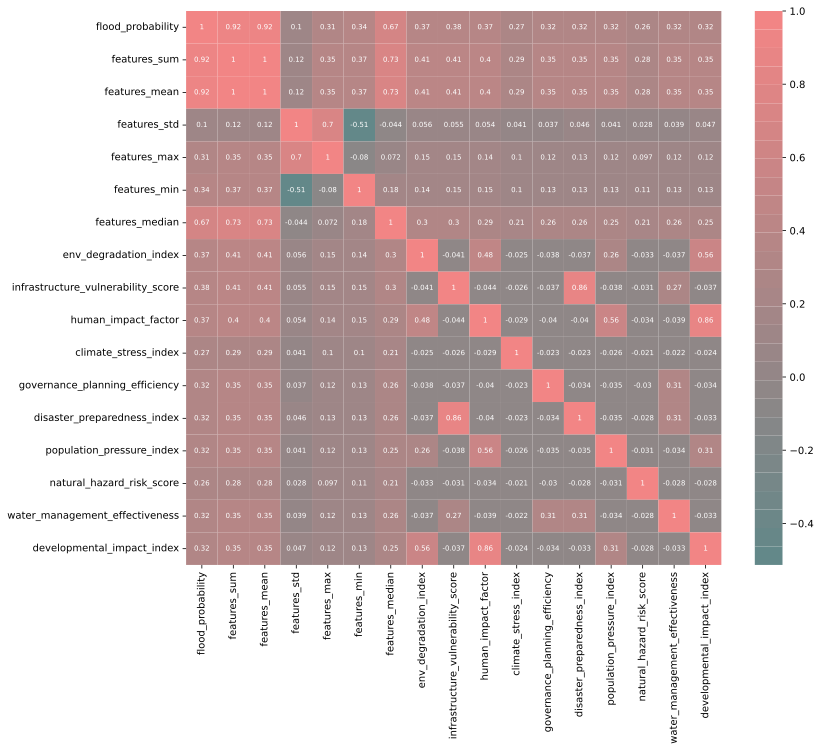

In [23]:
# Create a figure with custom size
plt.figure(figsize=(12, 10))

# Generate a heatmap of correlations for numerical columns, excluding base features
sns.heatmap(
    df.drop(columns=BASE_FEATURES).select_dtypes(include=np.number).corr(),  # DataFrame correlation matrix
    annot=True,  # Show correlation values in cells
    cmap=['#638889', '#678788', '#6c8788', '#718788', '#768788', '#7b8788', '#808788', '#858788', '#8a8787', '#8f8787', 
          '#948687', '#998687', '#9e8687', '#a38687', '#a88687', '#ac8686', '#b18686', '#b68686', '#bb8686', '#c08686',
          '#c58586', '#ca8586', '#cf8585', '#d48585', '#d98585', '#de8585', '#e38585', '#e88585', '#ed8585', '#f28585'],
    annot_kws={"fontsize": 7}  # Annotation font size
)

# Display the heatmap
plt.show()

In [24]:
# Extract features and encode categorical variables using one-hot encoding
X = df[:len(train)].drop(columns='flood_probability')
TEST = df[len(train):]

# Extract the target variable
y = df[:len(train)]['flood_probability']


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='nth'></a> Feature Selection

In [25]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the features in postlasso_df using StandardScaler
X_scaled = scaler.fit_transform(X)

lasso_cv = LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1],
                   max_iter=1000, cv=5, random_state=42)

# Fit the LassoCV model to the scaled feature matrix X_scaled and the target vector y
lasso_cv.fit(X_scaled, y)

# Extract the column names (features) where the coefficients are non-zero
selected_features = X.columns[(lasso_cv.coef_ != 0).ravel()].tolist()

# Print the number of selected features
print(selected_features)

['features_sum', 'features_std', 'features_max', 'features_min']


In [26]:
# Create a DataFrame with feature names and their coefficients from Lasso regression
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Coefficient': lasso_cv.coef_  # Coefficients from Lasso regression
})

# Filter out features with non-zero coefficients
lasso_filtered = lasso_coefficients[abs(lasso_coefficients['Coefficient']) > 0]

# Sort the filtered DataFrame by coefficient values in descending order and reset index
lasso_filtered_sorted = lasso_filtered.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(lasso_filtered_sorted)


        Feature  Coefficient
0  features_sum     0.046784
1  features_min     0.000330
2  features_std    -0.000053
3  features_max    -0.000269


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='sixth'></a> Data Splitting

In [27]:
# Select only the columns (features) identified as important by the Lasso regression model
postlasso_df = X[selected_features]

# Splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(postlasso_df, y, test_size=0.3, random_state=42)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='seventh'></a> Model Training and Validating

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

### Feature Selection and Transformation

The `NumberSelector` class facilitates feature selection within the pipeline. It inherits from `BaseEstimator` and `TransformerMixin`, allowing seamless integration into scikit-learn's pipeline framework. This class:

- **Initialization (`__init__`):** Accepts a `key` parameter specifying the column to select.
- **Fit Method (`fit`):** Implements a no-operation fit method returning `self`, ensuring compatibility with the pipeline structure.
- **Transform Method (`transform`):** Selects and returns the specified column from the input DataFrame.

This class ensures specific columns are appropriately processed in the pipeline.

### Model Parameter Distribution

The `params` dictionary defines hyperparameters for the `LGBMRegressor` to be optimized. It includes parameters such as `learning_rate`, `n_estimators`, `max_depth`, and `num_leaves`, crucial for controlling model complexity and performance.

### Cross-Validation Strategy

The code employs `GridSearchCV` for hyperparameter tuning, utilizing 5-fold cross-validation. This strategy involves splitting the data into training and validation sets and iteratively training and evaluating the model on each fold.

### Feature Engineering Pipeline

For each column in the training data, a pipeline is created comprising:

- **Number Selection (`NumberSelector`):** Selects the column.
- **Scaling (`StandardScaler`):** Scales the data.

These pipelines are combined using `FeatureUnion`, ensuring each feature is processed independently before merging back into a single dataset.

### Model Pipeline and Hyperparameter Tuning

The final model pipeline consists of:

- **Feature Processing (`FeatureUnion`):** Combines the feature transformation pipelines.
- **Regressor (`LGBMRegressor`):** A gradient boosting regressor optimized for speed and performance.

Hyperparameter tuning is performed using `GridSearchCV`, iterating through different hyperparameter combinations to find the optimal set.

### Model Evaluation

After fitting the model, R-squared and RMSE scores are computed on the test set to evaluate performance. These metrics provide insight into the model's predictive capability and goodness of fit.

### Summary

This code demonstrates a robust approach to model building, incorporating feature transformation, hyperparameter optimization, and rigorous evaluation techniques. The use of scikit-learn's pipeline framework and grid search facilitates efficient model development and tuning, ultimately leading to improved predictive performance.

In [28]:

# Define models with their corresponding estimators
models = {
    'LGBMRegressor': LGBMRegressor(verbose=-1)
}

# Define hyperparameter grids for each model
params = {
    'LGBMRegressor': {
        'model__learning_rate': [0.01, 0.1, 0.3],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 7],
        'model__num_leaves': [15, 31, 63]
    }
}

In [29]:
# Define a function to calculate the root mean squared error (RMSE)
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create a custom scorer 'rmse_scorer' using make_scorer
# 'greater_is_better=False' indicates that lower values of the scoring function are better
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [30]:
class NumberSelector(BaseEstimator, TransformerMixin):
    # Initialize the transformer with a key
    def __init__(self, key):
        # Store the provided key as an instance variable
        self.key = key

    # The fit method is required but doesn't need to do anything for this transformer
    def fit(self, X, y=None):
        # Return self to allow for method chaining
        return self

    # The transform method selects and returns the column specified by the key
    def transform(self, X):
        # Use the key to select the column from the DataFrame X and return it
        return X[[self.key]]



# Initialize an empty list to store the results
results = []

# Initialize variables to track the best model and its R-squared score
best_model = None
best_r2 = float('-inf')

# Iterate over each model in the models dictionary
for name, model in models.items():


    # List to store transformers for each column
    final_transformers = []
    
    # Create a pipeline for each column in the training set
    for col in X_train.columns:
        pipeline = Pipeline([
            ('selector', NumberSelector(key=col)),  # Select the column
            ('scaler', StandardScaler()),
        ])
        final_transformers.append((col, pipeline))
    
    # Combine all column transformers into a FeatureUnion
    feats = FeatureUnion(final_transformers)
    
    # Create a pipeline for feature processing
    feature_processing = Pipeline([('feats', feats)])
    
    # Create the final pipeline including the feature processing and the classifier
    pipeline = Pipeline([
        ('features', feature_processing),
        ('model', model)
    ])

    
    # Check if hyperparameters for the current model are defined in the params dictionary
    if name in params:
        # If hyperparameters are defined, perform grid search with cross-validation
        grid_search = GridSearchCV(pipeline, params[name], cv=5, scoring=rmse_scorer)
    else:
        # If hyperparameters are not defined, perform grid search with default hyperparameters
        grid_search = GridSearchCV(pipeline, {}, cv=5, scoring=rmse_scorer)
      
    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)
    
    # Calculate R-squared score and RMSE on the test set
    r2 = r2_score(y_test, y_pred)
    rmse_val = rmse(y_test, y_pred)
    
    # Update the best model and its R-squared score if the current model performs better
    if r2 > best_r2:
        best_r2 = r2
        best_model = grid_search
    
    # Append the results to the results list
    results.append({
        'Model': name,
        'R-Squared Score': r2,
        'RMSE Score': rmse_val,
        'Best Parameters': grid_search.best_params_
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

In [31]:
# Set the display option to show all the contents of DataFrame columns without truncation
pd.set_option('display.max_colwidth', None)

# Set the display option to format float numbers with a precision of 5 decimal places
pd.set_option('display.float_format', '{:.5f}'.format)

# Display the DataFrame results_df
results_df

,Model,R-Squared Score,RMSE Score,Best Parameters
0,LGBMRegressor,0.86923,0.01844,"{'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__num_leaves': 63}"


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='eighth'></a> Model Evaluation and Data Interpretation

In [32]:
# Calculate residuals
residuals = y_test - y_pred

# Calculate standard deviation of residuals
sigma = np.std(residuals)

# Create a list for hue parameter
hue = list(map(lambda x: abs(x) < sigma, residuals))

# Create a residual plot
# plt.figure(figsize=(10, 7))
# sns.scatterplot(x=y_pred, y=residuals, hue=hue, palette = ['#E5C287', '#007F79'], s=100)
# plt.axhline(y=0, color='#A79277', linestyle='--', lw=1)
# plt.xlabel('Predicted')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.savefig('./images/residuals.png')
# plt.show()


<!-- <img src="./images/residuals.png"> -->


![My Image_01](./images/residuals.png)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 40px; text-align: center; font-family: avenir;">
    
### Feature Importances

In [33]:
# Access the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Access the regressor from the best estimator
regressor = best_estimator.named_steps['model']

# Check if the regressor has feature_importances_ attribute
if hasattr(regressor, 'feature_importances_'):
    # Get feature importances
    feature_importances = regressor.feature_importances_
    
    # Access the 'features' pipeline from the best estimator
    features_pipeline = best_estimator.named_steps['features']
    
    # Manually specify the feature names after transformation
    numeric_feature_names = X_train.columns.tolist()  # Assuming all columns are numeric
    
    # Calculate the total importance sum of all features
    total_importance = feature_importances.sum()
    
    # Calculate the percentage contribution of each feature
    feature_importance_percentage = (feature_importances / total_importance) * 100
    
    # Create a DataFrame with the percentage contribution of each feature
    features_percentage_df = pd.DataFrame({'Feature': numeric_feature_names, 'Importance (%)': feature_importance_percentage})
    
    # Sort the DataFrame by importance in descending order
    features_percentage_df = features_percentage_df.sort_values(by='Importance (%)', ascending=False)
    
    # Display the top features with their percentage contributions
    print(features_percentage_df.head())





        Feature  Importance (%)
0  features_sum        44.76128
1  features_std        30.43832
2  features_max        17.27228
3  features_min         7.52811


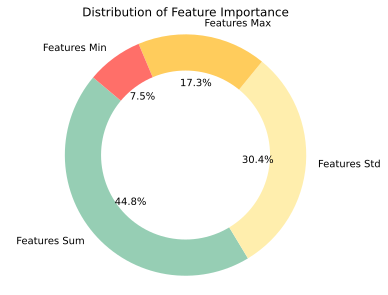

In [36]:
# Store the counts in a list
features = features_percentage_df['Feature'].tolist()
counts = features_percentage_df['Importance (%)']

# Define labels for the counts
labels = list(map(lambda x: x.replace('_', ' ').title(), features))

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#96ceb4', '#ffeead', '#ffcc5c', '#ff6f69'])

# Draw a circle in the center to create a ring
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Distribution of Feature Importance')

plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
    
## Data Interpretation:

The analysis of the outcomes from the statistical methods provides insights into how each factor contributes to flood probability. By applying various statistical functions to the features and examining their importance percentages, we can understand the relative influence of different statistical summaries on the prediction of flood probability.

### Summary of Applied Statistical Functions:

1. **Sum (`features_sum`)**:
   - **Importance: 44.76%**
   - This high importance suggests that the aggregate sum of the features plays a significant role in determining flood probability. It indicates that the overall magnitude of the features combined is a strong predictor.

2. **Standard Deviation (`features_std`)**:
   - **Importance: 30.44%**
   - The standard deviation measures the variability or dispersion of the features. A substantial contribution to flood probability implies that areas with more variability in their features are more likely to experience flooding.

3. **Maximum (`features_max`)**:
   - **Importance: 17.27%**
   - The maximum value among the features also has a notable impact. This could mean that extreme values of certain features are critical in assessing flood risks.

4. **Minimum (`features_min`)**:
   - **Importance: 7.53%**
   - Although the minimum value has the least importance among the calculated statistics, it still contributes to the overall flood probability assessment. Lower values of certain features may also influence flood predictions, albeit to a lesser extent.

### Interpretation:

The statistical methods applied to the features of the dataset reveal that the sum of the features is the most influential factor in predicting flood probability, followed by the variability (standard deviation), the maximum values, and lastly, the minimum values. This implies that both the overall levels and the spread or extremities of the features are crucial in assessing flood risks. The significant role of the sum and standard deviation highlights the importance of both the cumulative impact and the variability of environmental factors in flood prediction models.

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ffeead, #96ceb4, #b8a9c9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir;">
    
# <a id='ten'></a> Test Data Submission

In [37]:
# Select only the columns (features) identified as important by the Lasso regression model in the testing dataset
X = TEST[selected_features]

# Use the best_model to predict the target variable for the testing dataset
target_pred = grid_search.predict(X)

# Read the sample submission file and set the 'Id' column as the index
submission = pd.read_csv('./data/sample_submission.csv', index_col='id')

# Update the 'SalePrice' column in the submission DataFrame with the predicted target variable values
submission['FloodProbability'] = target_pred

# Save the submission DataFrame to a CSV file named 'submission.csv' in the './data' directory
submission.to_csv('./data/submission.csv')

In [38]:
!pip freeze > requirements.txt

In [39]:
!python3 --version

Python 3.11.7


In [39]:
!which python

/Users/sergey/.pyenv/versions/3.11.7/bin/python
